# MM Homework 2

**FBA Quant 이의형**

---

In [1]:
DATA_PATH = 'data/'

### Problem 1. Quoted spread for different trade sizes

Consider the following LOB. (This data is in the file with its name as ch2_ex1.xlsx)

From the data in this table, compute the weighted average quoted spread (in absolute and relative terms) for 100, 500, 1,000 and 2,000 shares.  
Which side of the LOB is deeper for transactions of 2,000 shares or more?

In [2]:
import pandas as pd

ob = pd.read_excel(DATA_PATH + 'ch2_ex1.xlsx')
mid = int(len(ob) / 2)
ob.iloc[mid - 5:mid + 5]

,Price,Size,Time,Side
11,78.60,375,08:01:31.987000,Ask
12,78.64,500,09:30:04.032000,Ask
13,78.87,20,07:01:01.027000,Ask
14,78.95,200,08:01:35.011000,Ask
15,80.00,350,09:15:00.029000,Ask
16,74.42,300,11:49:38.957000,Bid
17,74.41,100,11:46:54.970000,Bid
18,74.36,400,11:48:30.010000,Bid
19,74.36,400,11:48:31.997000,Bid
20,74.00,13,10:56:00.038000,Bid


In [3]:
def calculate_quoted_spread(ob, tg_shares, rel=True):
    ask_prc = calculate_avg_prc(ob, tg_shares, 'ask')
    bid_prc = calculate_avg_prc(ob, tg_shares, 'bid')
    abs_spread = ask_prc - bid_prc
    if rel:
        mid_prc = calculate_mid_prc(ob)
        return abs_spread / mid_prc
    return abs_spread


def calculate_avg_prc(ob, tg_shares, side):
    trd_val = 0
    tg_shares = tg_shares
    init_tg_shares = tg_shares
    is_asc = get_sort_flag(side)
    ob = ob[ob.Side.eq(side.capitalize())].sort_values('Price', ascending=is_asc)
    
    for tup in ob.itertuples():
        trd_shares = min(tg_shares, tup.Size)
        trd_val += trd_shares * tup.Price
        tg_shares -= trd_shares
        if tg_shares == 0:
            avg_prc = trd_val / init_tg_shares
            return avg_prc
    raise Exception(f"Insufficient depth in orderbook.")


def get_sort_flag(side):
    match side:
        case 'ask':
            return True
        case 'bid':
            return False
        case _:
            raise ValueError(f"Input 'bid' or 'ask', not {side}")


def calculate_mid_prc(ob):
    ob_ask = ob[ob.Side.eq('Ask')]
    ob_bid = ob[ob.Side.eq('Bid')]

    best_ask_idx = ob_ask.Price.min()
    best_bid_idx = ob_bid.Price.max()
    
    mid_prc = (best_ask_idx + best_bid_idx) / 2
    return mid_prc

In [4]:
shares = [100, 500, 1000, 2000]
for s in shares:
    print(f"shares: {s:,}")
    print(f"- abs: {calculate_quoted_spread(ob, s, rel=False):.4f}")
    print(f"- rel: {calculate_quoted_spread(ob, s, rel=True):.6f}")
    print()

shares: 100
- abs: 0.0600
- rel: 0.000806

shares: 500
- abs: 0.0740
- rel: 0.000994

shares: 1,000
- abs: 0.3750
- rel: 0.005037

shares: 2,000
- abs: 1.8388
- rel: 0.024699



---

### Problem 2. Measure of bid-ask spread

Your fund is considering trading 10-year bonds issued by the Austrian government, and you see that at 9:30 a.m.  
their lowest ask price is 102.31 and their highest bid price is 99.50.  
Five seconds later a buy order for a block of 10 billion is executed at 102.76.  
At 10:30 a.m. you check the market again and see that the lowest ask price is 102.55 and the highest bid price is 100.02.

In [5]:
t_0930 = {
    'ask': 102.31,
    'bid': 99.50
}
t_1030 = {
    'ask': 102.55,
    'bid': 100.02
}
exec_prc = 102.76

**a. Compute the absolute and the relative quoted spread at 9:30 and 10:30.**

In [6]:
for t in [t_0930, t_1030]:
    mid_prc = (t['ask'] + t['bid']) / 2
    abs_spread = t['ask'] -  t['bid']
    rel_spread = abs_spread / mid_prc
    print(f"- abs: {abs_spread:.4f}\n- rel: {rel_spread:.6f}\n")

- abs: 2.8100
- rel: 0.027848

- abs: 2.5300
- rel: 0.024979



**b. Compute the absolute and the relative effective ask-side half-spread at 9:30.**

In [7]:
mid_prc = (t_0930['ask'] + t_0930['bid']) / 2
side_flag = 1
abs_eff_spread = side_flag * (exec_prc - mid_prc)
rel_eff_spread = abs_eff_spread / mid_prc
print(f"abs: {abs_eff_spread:.4f}\nrel: {rel_eff_spread:.6f}\n")

abs: 1.8550
rel: 0.018384



**c. Compare the quoted half-spread with the effective ask-side half-spread (both in absolute and in relative terms) at 9:30.  
What explains the  difference between them?**

quoted half-spread는 1.405인 반면, effective ask-side half-spread는 2.53로 스프레드가 더 커졌음을 알 수 있다.  
이는 매도 주문을 취한 매수 주도 거래가 유동성을 소모했다는 것을 의미한다.  
relative spread 또한 같은 결과를 보이며, 이를 통해 매매가 가격에 미치는 영향을 알 수 있다.

**d. Compute the absolute realized spread in the 9:30–10:30 interval.  
particular, indicate the change in the bid-ask spread associated with a 1 percent increase in trading volume, according to your estimates.**

In [8]:
mid_prc_0930 = (t_0930['ask'] + t_0930['bid']) / 2
mid_prc_1030 = (t_1030['ask'] + t_1030['bid']) / 2

side_flag = 1

abs_eff_spread = side_flag * (exec_prc - mid_prc_0930)
prc_chg = side_flag * (mid_prc_1030 - mid_prc_0930)
r_spread = abs_eff_spread - prc_chg
print(f"mid_prc_0930   : {mid_prc_0930:.4f}")
print(f"mid_prc_1030   : {mid_prc_1030:.4f}")
print(f"exec_prc       : {exec_prc:.4f}")
print(f"eff_spread     : {abs_eff_spread:.4f}")
print(f"realized_spread: {r_spread:.4f}")

mid_prc_0930   : 100.9050
mid_prc_1030   : 101.2850
exec_prc       : 102.7600
eff_spread     : 1.8550
realized_spread: 1.4750


**e. Compare the realized spread computed under point d with the absolute effective spread at 9:30 computed under point b.  
What explains the difference between them?**

유동성 수요자가 소비한 유동성이 전부 유동성 공급자의 이익으로 돌아가진 않는다.  
수요자의 소비 방향이 향후 가격에 영향을 미친다면, 실제로 공급자가 얻을 수 있는 이익은 더 적을 수 있다.  
(거래 방향과 거래 후 mid price의 변화가 양의 상관관계가 있다면)  
따라서 공급자가 물량을 소비한 뒤, 가격이 오르게 되면 공급자는 오른 가격만큼 더 적은 이익을 얻을 수밖에 없을 것이다.  
만약 effective spread가 아주 작은 경우, 공급자는 손실을 볼 수 있다.

---

### Problem 3. Roll’s estimator and price improvements.

Consider Roll’s model. All the assumptions are unchanged,  
but we do assume that the transaction occurring at time t occurs either at the ask or bid price with probability λ, or at the midprice with probability 1-λ.  
Thus, 1-λ can be seen as the fraction of trades that receive a price improvement or are crossed by brokers at the midprice.  
Propose an estimator of the quoted bid-ask spread S for this case.

bid, ask 체결만 있는 경우,

$
\Delta P_t = P_t - P_{t-1}
$

$
= m_t + \frac{S}{2} d_t - (m_{t-1} + \frac{S}{2} d_{t-1})
$

$
= \frac{S}{2} d_t - \frac{S}{2} d_{t-1} + \varepsilon_t
$

　

bid, ask 체결확률이 $\lambda,$ mid price 체결확률이 $1 - \lambda$인 경우,

$
P_t = (1-\lambda) m_t + \lambda \left( m_t + \frac{S}{2} d_t \right)
$


$
\Delta P_t = P_t - P_{t-1}
$

$
= m_t + \lambda \frac{S}{2} d_t - (m_{t-1} + \lambda \frac{S}{2} d_{t-1})
$

$
= \lambda \frac{S}{2} d_t - \lambda \frac{S}{2} d_{t-1} + \varepsilon_t
$

　

$
\displaystyle \operatorname{Cov} (\Delta P_t, \Delta P_{t+1}) = \lambda^2 \frac{S^2}{4} \mathbb{E} [(d_t - d_{t-1})(d_{t+1} - d_t)]
$

$
\displaystyle \Rightarrow S = \frac {2} {\lambda} \sqrt {\operatorname{Cov} (\Delta P_t, \Delta P_{t+1})}
$

---

### Problem 4. Empirical measurement of quoted spreads. 
The data for this exercise are contained in an Excel ﬁle, Ch2_AGF_data.xls:  
a record of one day’s transactions in the shares of a French company, AGF, on the Paris Bourse. The data comprise:  

• time of the transaction  
• size of the transaction  
• (average) transaction price  
• best bid price immediately before the transaction  
• best ask price immediately before the transaction  
• direction of trade initiation (−1 for transactions below the midprice, + 1 above the midprice)  


In [9]:
import numpy as np
import pandas as pd

tr = pd.read_excel(DATA_PATH + 'Ch2_AGF_data.xlsx')
tr.head(5)

,Time,Trade Size (|qt|),Price (pt),Direction (dt),Bid(bt),Ask (at)
0,09:06:04,20,66.7000,-1,66.90,67.00
1,09:06:11,25,66.6360,-1,66.65,66.70
2,09:06:26,18,66.6000,-1,66.60,66.65
3,09:07:18,273,66.4163,-1,66.50,66.55
4,09:07:36,27,66.5500,1,66.15,66.55


In [10]:
tr.columns = ['time', 'qty', 'avg_prc', 'direction', 'bid', 'ask']
tr.head(5)

,time,qty,avg_prc,direction,bid,ask
0,09:06:04,20,66.7000,-1,66.90,67.00
1,09:06:11,25,66.6360,-1,66.65,66.70
2,09:06:26,18,66.6000,-1,66.60,66.65
3,09:07:18,273,66.4163,-1,66.50,66.55
4,09:07:36,27,66.5500,1,66.15,66.55


**a. For each transaction, compute the absolute spread S in euro (e); compute the relative spread, s and the log spread: ln(ask)—ln(bid); and compare the average of these three measures.  
Then compute the average absolute spread for each of the 17 half-hour time periods of the trading day and plot a graph of your results showing the intraday evolution of the spread.  What kind of pattern over the day would you expect, a priori?**

In [11]:
tr['mid'] = (tr.ask + tr.bid) / 2
abs_spread = tr.ask - tr.bid
rel_spread = abs_spread / tr['mid']
log_spread = (tr.ask / tr.bid).apply(np.log)

print(f"abs_spread: {abs_spread.mean():.4f}")
print(f"rel_spread: {rel_spread.mean():.4f}")
print(f"log_spread: {log_spread.mean():.4f}")

abs_spread: 0.1062
rel_spread: 0.0016
log_spread: 0.0016


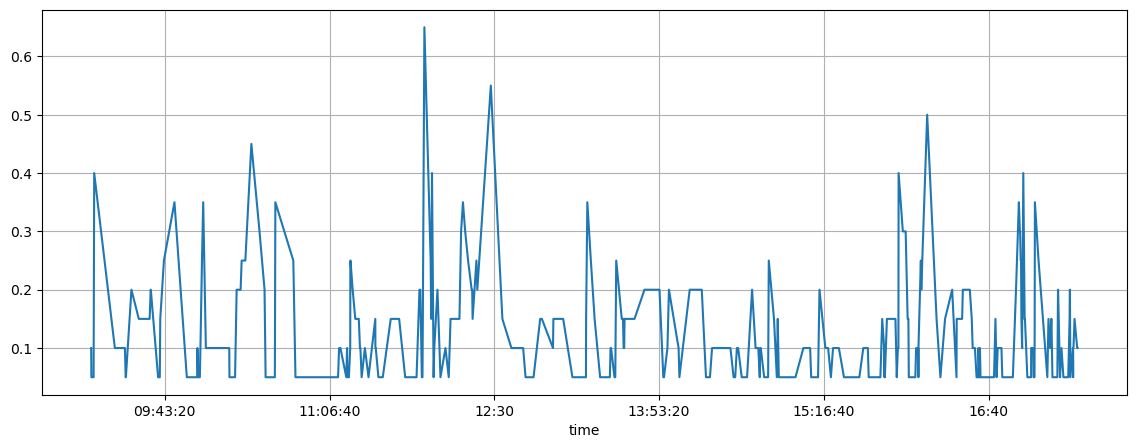

In [12]:
spread = pd.DataFrame(index=tr.time,
                      data={'abs': abs_spread.values,
                            'rel': rel_spread.values,
                            'log': log_spread.values})
spread['abs'].plot(figsize=(14, 5), grid=True);

**b. Compute and compare the average effective trading cost or “halfspread” in absolute terms, relative terms, and logs.**

In [13]:
abs_spread = abs(tr.avg_prc - tr.mid) * 2
rel_spread = abs_spread / tr['mid']
log_spread = (tr.ask / tr.bid).apply(np.log)

print(f"abs_spread: {abs_spread.mean():.4f}")
print(f"rel_spread: {rel_spread.mean():.4f}")
print(f"log_spread: {log_spread.mean():.4f}")

abs_spread: 0.1183
rel_spread: 0.0018
log_spread: 0.0016


**c. Compute the VWAP for the day. Then calculate the VWAP for buyer and seller-initiated transactions for the whole day and compare your results with the VWAP benchmark. Repeat, again separately for buyer and seller-initiated transactions, for transactions divided into three time periods: 9:00 a.m–12:00 a.m., 12:00–3:00, and 3:00–5:30 p.m**

In [14]:
def show_vwap(tr, start_time='00:00:00', end_time='23:59:59'):
    params = dict(
        tr=tr,
        start_time=start_time,
        end_time=end_time
    )
    vwap = calculate_vwap(**params)
    vwap_buy = calculate_vwap(**params, initiated='buyer')
    vwap_sell = calculate_vwap(**params, initiated='seller')

    print(f"{start_time} ~ {end_time}")
    print(f"- VWAP                  : {vwap:.4f}")
    print(f"- VWAP(buyer-initiated) : {vwap_buy:.4f}")
    print(f"- VWAP(seller-initiated): {vwap_sell:.4f}")
    print()


def calculate_vwap(tr, start_time='00:00:00', end_time='23:59:59', initiated=None):
    if initiated is not None:
        match initiated:
            case 'buyer':
                is_bid = tr.direction.eq(1)
                idx = is_bid[is_bid].index
            case 'seller':
                is_ask = tr.direction.eq(-1)
                idx = is_ask[is_ask].index
            case _:
                raise ValueError(f"Input 'buyer' or 'seller', not {initiated}")
    else:
        idx = tr.index

    tr = tr.loc[idx]
    tr_strtime = tr.time.astype(str)
    tr = tr[tr_strtime.gt(start_time) & tr_strtime.le(end_time)]

    w = tr.qty / tr.qty.sum()
    return tr.avg_prc @ w

In [15]:
start_times = ['09:00:00', '12:00:00', '15:00:00']
end_times = ['12:00:00', '15:00:00', '17:30:00']

for start, end in zip(start_times, end_times):
    show_vwap(tr, start, end)

09:00:00 ~ 12:00:00
- VWAP                  : 66.0004
- VWAP(buyer-initiated) : 66.0921
- VWAP(seller-initiated): 65.9024

12:00:00 ~ 15:00:00
- VWAP                  : 66.0573
- VWAP(buyer-initiated) : 66.1039
- VWAP(seller-initiated): 65.9963

15:00:00 ~ 17:30:00
- VWAP                  : 65.9400
- VWAP(buyer-initiated) : 66.0864
- VWAP(seller-initiated): 65.8599



**d. Compute Roll’s estimate of the bid-ask spread both in euro (e) and in relative terms (using the logarithm of the prices). Then repeat the computations clock time rather than transaction time: take the last transaction in every 15-minute time interval. Compare your results with those previously obtained: what explains the difference in Roll’s measure?**

In [16]:
def calculate_roll_spread(mid_prcs):
    delta_tm1_t = mid_prcs.diff()
    delta_t_tp1 = delta_tm1_t.shift(1)
    cov_prc = delta_tm1_t.cov(delta_t_tp1)
    if cov_prc > 0:
        raise ValueError("cov_prc {cov_prc} > 0")
    roll_spread = 2 * np.sqrt(-cov_prc)
    return roll_spread

In [17]:
roll_spread_abs = calculate_roll_spread(tr.mid)
roll_spread_rel = calculate_roll_spread(tr.mid.apply(np.log))

idx_dt = pd.to_datetime(tr.time.astype(str), format='%H:%M:%S')
tr_15m = tr.set_index(idx_dt).resample('15min').last()
roll_spread_abs_15m = calculate_roll_spread(tr_15m.mid)
roll_spread_rel_15m = calculate_roll_spread(tr_15m.mid.apply(np.log))

print(f"roll_spread_abs    : {roll_spread_abs:.4f}")
print(f"roll_spread_rel    : {roll_spread_rel:.4f}")
print(f"roll_spread_abs_15m: {roll_spread_abs_15m:.4f}")
print(f"roll_spread_rel_15m: {roll_spread_rel_15m:.4f}")

roll_spread_abs    : 0.0303
roll_spread_rel    : 0.0005
roll_spread_abs_15m: 0.0233
roll_spread_rel_15m: 0.0004


Roll's Measure는 가격 반전에 대한 가정을 기반으로, 이전 가격 변화와 현재 가격 변화의 공분산으로 계산된다.  

계산 결과, 스프레드는 15분 단위르 측정했을 때보다 거래마다 측정했을 때 더 크게 나타난다.  

이는 높은 빈도의 시계열에서 가격 반전이 더 뚜렷히 나타나 음의 상관관계가 커지고, 낮은 빈도에서는 상관관계가 적다는 것을 의미한다.  

또한, 다른 스프레드 추정 방법에 비해 스프레드가 낮게 나타나는데, 이에 대해 Roll's Measure가 스프레드를 과소평가한다고 생각할 수도 있다.  

Roll's Measure는 다음을 가정한다.  
- balanced order flow
- non-autocorrelated orders
- no effect of orders on the mid quote

실제 시장에서는 이러한 가정이 성립하지 않는 경우가 많으며, 각 가정이 성립하지 않을 때 스프레드가 과소추정될 수 있다.

**e. Split the trading day into 15-minute intervals: 9:00–9:15 a.m., 9:15-9:30 a.m., …, 5:15–5:30 p.m. For each interval, compute the midprice change (from the last transaction of the previous interval to the last one of the current interval; for the ﬁrst interval take the midprice at 9:06:04 as the initial midprice) and the cumulative signed order ﬂow over the interval expressed as a fraction of the day’s total (unsigned) order ﬂow. Perform a regression analysis on the 34 data points you obtain in this way, to estimate the price impact parameter λ. Is the estimated parameter signiﬁcantly different from zero? What is the impact on the midprice of a 1% relative order ﬂow increase?**

In [18]:
tr['order_flow'] = tr.qty * tr.direction

idx_dt = pd.to_datetime(tr.time.astype(str), format='%H:%M:%S')
tr_15m = tr.set_index(idx_dt).drop(columns='time').resample('15min').last()
tr_15m_cum = tr.set_index(idx_dt).drop(columns='time').resample('15min').sum()

In [19]:
prc_diff = tr_15m.mid.pct_change()
prc_diff.iat[0] = tr_15m.mid.iat[0] / tr.mid.iat[0] - 1
prc_diff.values

array([-0.00896191, -0.0037679 , -0.00189107,  0.00189466,  0.        ,
       -0.00642965, -0.00076132, -0.00152381,  0.00038153,  0.01067887,
        0.00339623, -0.00639338, -0.00264951,  0.00607211, -0.00037722,
       -0.00264151, -0.00075672, -0.0034078 ,  0.0018997 ,  0.00417141,
       -0.00377644,  0.0015163 ,  0.        ,  0.00264951, -0.0011325 ,
       -0.00037793, -0.00151229, -0.00530102,  0.0060906 , -0.00037836,
        0.000757  , -0.00491679,  0.00304067,  0.01098901])

In [20]:
order_flow = tr_15m_cum.order_flow / tr.qty.sum()
order_flow.values

array([-0.00102565,  0.00144056, -0.00640619,  0.00632653,  0.0070966 ,
       -0.00831145, -0.00973874, -0.01004411,  0.00647258,  0.00921098,
        0.02532604, -0.01456164,  0.01096687,  0.01183984,  0.00204135,
       -0.00119494, -0.02405144, -0.01150127,  0.0200152 ,  0.000707  ,
       -0.00505193,  0.0188269 , -0.0096292 ,  0.01666938, -0.00318982,
        0.01176681, -0.06550913, -0.0418726 ,  0.01947748, -0.01106313,
       -0.05541522, -0.09263089,  0.01540805,  0.04534456])

In [21]:
from statsmodels.api import OLS

x = order_flow.values.reshape(-1, 1)
X = np.hstack([np.ones((x.shape[0], 1)), x])
y = prc_diff

ols = OLS(y, X).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mid   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     11.57
Date:                Mon, 10 Mar 2025   Prob (F-statistic):            0.00181
Time:                        00:27:46   Log-Likelihood:                 141.87
No. Observations:                  34   AIC:                            -279.7
Df Residuals:                      32   BIC:                            -276.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.383      0.704      -0.001       0.002
x1             0.0852      0.025      3.402      0.002       0.034       0.136
==============================================================================
Omnibus:                        1.400   Durbin-Watson:                   1.550
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.503
Skew:                           0.180   Prob(JB):                        0.777
Kurtosis:                       3.475   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value 0.002로, 추정된 계수는 유의미하다고 볼 수 있다.  

15분간 일중 거래량의 1%가 한쪽으로 움직일 때, 가격은 같은 방향으로 약 8.52bp 움직였다.

---